In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('data_impurities.csv', index_col = 0)
df

,Fe,Co,Ni,Cu,Ru,Rh,Pd,Ag,Ir,Pt,Au
Fe,-0.92,0.05,-0.20,-0.13,-0.29,-0.54,-1.24,-0.83,-0.36,-1.09,-1.42
Co,0.01,-1.17,-0.28,-0.16,-0.24,-0.58,-1.37,-0.91,-0.36,-1.19,-1.56
Ni,0.09,0.19,-1.29,0.19,-0.14,-0.31,-0.97,-0.53,-0.14,-0.80,-1.13
Cu,0.56,0.60,0.27,-2.67,0.58,0.32,-0.64,-0.70,0.58,-0.33,-1.09
Ru,0.21,0.26,0.01,0.12,-1.41,-0.17,-0.82,-0.27,0.02,-0.62,-0.84
Rh,0.24,0.34,0.16,0.44,0.04,-1.73,-0.54,0.07,0.17,-0.35,-0.49
Pd,0.37,0.54,0.50,0.94,0.24,0.36,-1.83,0.59,0.53,0.19,0.17
Ag,0.72,0.84,0.67,0.47,0.84,0.86,0.14,-4.30,1.14,0.50,-0.15
Ir,0.21,0.27,0.05,0.21,0.09,-0.15,-0.73,-0.13,-2.11,-0.56,-0.74
Pt,0.33,0.48,0.40,0.72,0.14,0.23,-0.17,0.44,0.38,-2.25,-0.05


In [3]:
# 表中只有纯金属d带中心为绝对值，掺杂金属d带中心为相对值，需将相对值改为绝对值

for i in df.index:
    for j in df.columns:
        if i != j:
            df.loc[i, j] += df.loc[i, i]

In [4]:
df

,Fe,Co,Ni,Cu,Ru,Rh,Pd,Ag,Ir,Pt,Au
Fe,-0.92,-0.87,-1.12,-1.05,-1.21,-1.46,-2.16,-1.75,-1.28,-2.01,-2.34
Co,-1.16,-1.17,-1.45,-1.33,-1.41,-1.75,-2.54,-2.08,-1.53,-2.36,-2.73
Ni,-1.20,-1.10,-1.29,-1.10,-1.43,-1.60,-2.26,-1.82,-1.43,-2.09,-2.42
Cu,-2.11,-2.07,-2.40,-2.67,-2.09,-2.35,-3.31,-3.37,-2.09,-3.00,-3.76
Ru,-1.20,-1.15,-1.40,-1.29,-1.41,-1.58,-2.23,-1.68,-1.39,-2.03,-2.25
Rh,-1.49,-1.39,-1.57,-1.29,-1.69,-1.73,-2.27,-1.66,-1.56,-2.08,-2.22
Pd,-1.46,-1.29,-1.33,-0.89,-1.59,-1.47,-1.83,-1.24,-1.30,-1.64,-1.66
Ag,-3.58,-3.46,-3.63,-3.83,-3.46,-3.44,-4.16,-4.30,-3.16,-3.80,-4.45
Ir,-1.90,-1.84,-2.06,-1.90,-2.02,-2.26,-2.84,-2.24,-2.11,-2.67,-2.85
Pt,-1.92,-1.77,-1.85,-1.53,-2.11,-2.02,-2.42,-1.81,-1.87,-2.25,-2.30


In [5]:
feat = pd.read_csv('data_impurities_features.csv', index_col = 0) #导入描述符数据
feat

,name,group,bulk wigner-seitz radius,atomic number,atomic mass,period,electronegativity,Iionization energy(eV),H_fus,density
Fe,Iron,8,2.66,26,55.84500,4,1.83,7.9024,247.3,7.87
Co,Cobalt,9,2.62,27,58.93320,4,1.88,7.8810,272.5,8.86
Ni,Nickel,10,2.60,28,58.69340,4,1.91,7.6398,290.3,8.90
Cu,Copper,11,2.67,29,63.54600,4,1.90,7.7264,203.5,8.96
Ru,Ruthenium,8,2.79,44,101.07000,5,2.20,7.3605,381.8,12.10
Rh,Rhodium,9,2.81,45,102.90550,5,2.28,7.4589,258.4,12.40
Pd,Palladium,10,2.87,46,106.42000,5,2.20,8.3369,157.3,12.00
Ag,Silver,11,3.01,47,107.86820,5,1.93,7.5762,104.6,10.50
Ir,Iridium,9,2.84,77,192.21700,6,2.20,8.9670,213.9,22.50
Pt,Platinum,10,2.90,78,195.07800,6,2.20,8.9588,113.6,21.50


In [6]:
feat = feat.drop('name', axis = 'columns')
feat

,group,bulk wigner-seitz radius,atomic number,atomic mass,period,electronegativity,Iionization energy(eV),H_fus,density
Fe,8,2.66,26,55.84500,4,1.83,7.9024,247.3,7.87
Co,9,2.62,27,58.93320,4,1.88,7.8810,272.5,8.86
Ni,10,2.60,28,58.69340,4,1.91,7.6398,290.3,8.90
Cu,11,2.67,29,63.54600,4,1.90,7.7264,203.5,8.96
Ru,8,2.79,44,101.07000,5,2.20,7.3605,381.8,12.10
Rh,9,2.81,45,102.90550,5,2.28,7.4589,258.4,12.40
Pd,10,2.87,46,106.42000,5,2.20,8.3369,157.3,12.00
Ag,11,3.01,47,107.86820,5,1.93,7.5762,104.6,10.50
Ir,9,2.84,77,192.21700,6,2.20,8.9670,213.9,22.50
Pt,10,2.90,78,195.07800,6,2.20,8.9588,113.6,21.50


In [7]:
# 拼接所有输入数据，与输出对应
x = list()
y = list()

for i in df.index:
    for j in df.columns:
        vec_i = feat.loc[i].to_numpy()
        vec_j = feat.loc[j].to_numpy()
        x_val = np.concatenate((vec_i, vec_j))
        y_val = df.loc[i, j]
        x.append(x_val)
        y.append(y_val)
        if i == 'Fe' and j == 'Co':
            print('host' + i + ', guest' + j + ', input = ' + str(x_val) + ', output = ' + str(y_val))

hostFe, guestCo, input = [  8.       2.66    26.      55.845    4.       1.83     7.9024 247.3
   7.87     9.       2.62    27.      58.9332   4.       1.88     7.881
 272.5      8.86  ], output = -0.87


In [8]:
X = np.array(x)
y = np.array(y)
X.shape, y.shape

((121, 18), (121,))

In [9]:
# 打乱数据，切分训练集和测试集
from sklearn.utils import shuffle

X_r, y_r = shuffle(X,y)
X_train, y_train = X_r[:-30, :], y_r[:-30]
X_test, y_test = X_r[-30:, :], y_r[-30:]

# 最小二乘回归

In [10]:
from sklearn.cross_decomposition import PLSRegression

pls = PLSRegression(n_components = 18)
pls.fit(X_train, y_train)

PLSRegression(n_components=18)

In [15]:
y_pred_train_pls = pls.predict(X_train)
y_pred_test_pls = pls.predict(X_test)

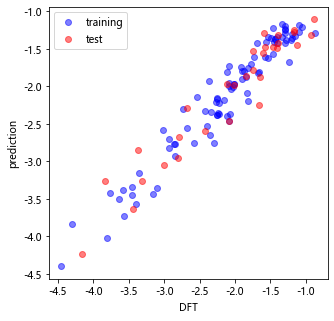

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize = (5, 5))
plt.scatter(y_train, y_pred_train_pls, alpha = 0.5, color = 'blue', label = 'training')
plt.scatter(y_test, y_pred_test_pls, alpha = 0.5, color = 'red', label = 'test')
#plt.plot(y_train, y_train)
plt.legend()
plt.xlabel('DFT')
plt.ylabel('prediction')
plt.show()

模型评价

In [18]:
from sklearn.metrics import mean_squared_error

rmse_tr_pls = mean_squared_error(y_train, y_pred_train_pls, squared = False)
rmse_te_pls = mean_squared_error(y_test, y_pred_test_pls, squared = False)

print('RMSE(training) %.3f' % rmse_tr_pls)
print('RMSE(test) %.3f' % rmse_te_pls)

RMSE(training) 0.201
RMSE(test) 0.252


交叉验证

In [29]:
from sklearn.model_selection import KFold, cross_val_score

crossvalidation = KFold(n_splits = 10, shuffle = True)
r2_scores_pls = cross_val_score(pls, X, y, scoring = 'r2', cv = crossvalidation)
rmse_scores_pls = cross_val_score(pls, X, y, scoring = 'neg_root_mean_squared_error', cv = crossvalidation)
print('Cross-validation results:')
print('Folds: %i, mean R2: %.3f' % (len(r2_scores_pls), r2_scores_pls.mean()))
print('Folds: %i, mean RMSE: %.3f'% (len(rmse_scores_pls), -rmse_scores_pls.mean()))

Cross-validation results:
Folds: 10, mean R2: 0.903
Folds: 10, mean RMSE: 0.246


# 高斯过程回归

In [30]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

In [32]:
gpr = make_pipeline(StandardScaler(), GaussianProcessRegressor(kernel = RBF(0.5)))
gpr.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gaussianprocessregressor',
                 GaussianProcessRegressor(kernel=RBF(length_scale=0.5)))])

In [33]:
y_pred_train_gpr = gpr.predict(X_train)
y_pred_test_gpr = gpr.predict(X_test)

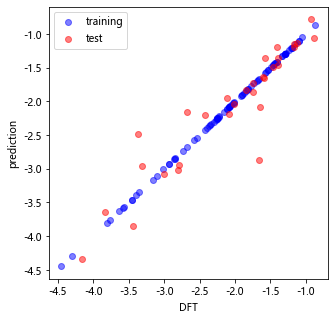

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize = (5, 5))
plt.scatter(y_train, y_pred_train_gpr, alpha = 0.5, color = 'blue', label = 'training')
plt.scatter(y_test, y_pred_test_gpr, alpha = 0.5, color = 'red', label = 'test')
#plt.plot(y_train, y_train)
plt.legend()
plt.xlabel('DFT')
plt.ylabel('prediction')
plt.show()

模型评价

In [35]:
from sklearn.metrics import mean_squared_error

rmse_tr_gpr = mean_squared_error(y_train, y_pred_train_gpr, squared = False)
rmse_te_gpr = mean_squared_error(y_test, y_pred_test_gpr, squared = False)

print('RMSE(training) %.3f' % rmse_tr_gpr)
print('RMSE(test) %.3f' % rmse_te_gpr)

RMSE(training) 0.000
RMSE(test) 0.337


交叉验证

In [36]:
from sklearn.model_selection import KFold, cross_val_score

crossvalidation = KFold(n_splits = 10, shuffle = True)
r2_scores_gpr = cross_val_score(pls, X, y, scoring = 'r2', cv = crossvalidation)
rmse_scores_gpr = cross_val_score(pls, X, y, scoring = 'neg_root_mean_squared_error', cv = crossvalidation)
print('Cross-validation results:')
print('Folds: %i, mean R2: %.3f' % (len(r2_scores_gpr), r2_scores_gpr.mean()))
print('Folds: %i, mean RMSE: %.3f'% (len(rmse_scores_gpr), -rmse_scores_gpr.mean()))

Cross-validation results:
Folds: 10, mean R2: 0.900
Folds: 10, mean RMSE: 0.237


# 可视化

In [39]:
df = pd.DataFrame(x)
df['y'] = y
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,y
0,8.0,2.66,26.0,55.84500,4.0,1.83,7.9024,247.3,7.87,8.0,2.66,26.0,55.84500,4.0,1.83,7.9024,247.3,7.87,-0.92
1,8.0,2.66,26.0,55.84500,4.0,1.83,7.9024,247.3,7.87,9.0,2.62,27.0,58.93320,4.0,1.88,7.8810,272.5,8.86,-0.87
2,8.0,2.66,26.0,55.84500,4.0,1.83,7.9024,247.3,7.87,10.0,2.60,28.0,58.69340,4.0,1.91,7.6398,290.3,8.90,-1.12
3,8.0,2.66,26.0,55.84500,4.0,1.83,7.9024,247.3,7.87,11.0,2.67,29.0,63.54600,4.0,1.90,7.7264,203.5,8.96,-1.05
4,8.0,2.66,26.0,55.84500,4.0,1.83,7.9024,247.3,7.87,8.0,2.79,44.0,101.07000,5.0,2.20,7.3605,381.8,12.10,-1.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,11.0,3.00,79.0,196.96655,6.0,2.40,9.2255,64.6,19.30,10.0,2.87,46.0,106.42000,5.0,2.20,8.3369,157.3,12.00,-3.39
117,11.0,3.00,79.0,196.96655,6.0,2.40,9.2255,64.6,19.30,11.0,3.01,47.0,107.86820,5.0,1.93,7.5762,104.6,10.50,-3.35
118,11.0,3.00,79.0,196.96655,6.0,2.40,9.2255,64.6,19.30,9.0,2.84,77.0,192.21700,6.0,2.20,8.9670,213.9,22.50,-2.58
119,11.0,3.00,79.0,196.96655,6.0,2.40,9.2255,64.6,19.30,10.0,2.90,78.0,195.07800,6.0,2.20,8.9588,113.6,21.50,-3.10


<AxesSubplot:>

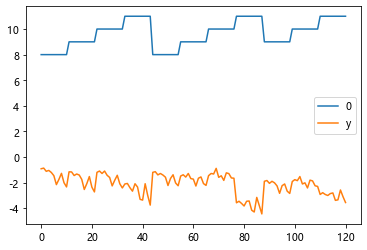

In [40]:
idx = [0, 'y']
df[idx].plot()

In [41]:
df.corr()['y'] #x与y的相关系数

0    -0.628485
1    -0.528149
2    -0.291100
3    -0.286463
4    -0.262104
5    -0.024741
6    -0.152404
7     0.564631
8    -0.169864
9    -0.236039
10   -0.347411
11   -0.264994
12   -0.260405
13   -0.274515
14   -0.279717
15   -0.240431
16    0.329626
17   -0.196517
y     1.000000
Name: y, dtype: float64

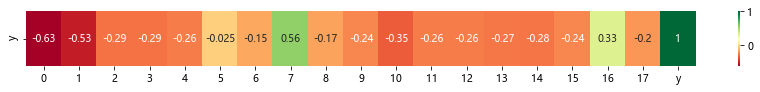

In [49]:
import seaborn as sns

plt.figure(figsize = (15,1))
sns.heatmap(df.corr()['y'].to_frame().T, cmap = 'RdYlGn', annot = True) # .to_frame()转化为frame，.T为转置, annot显示数值
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

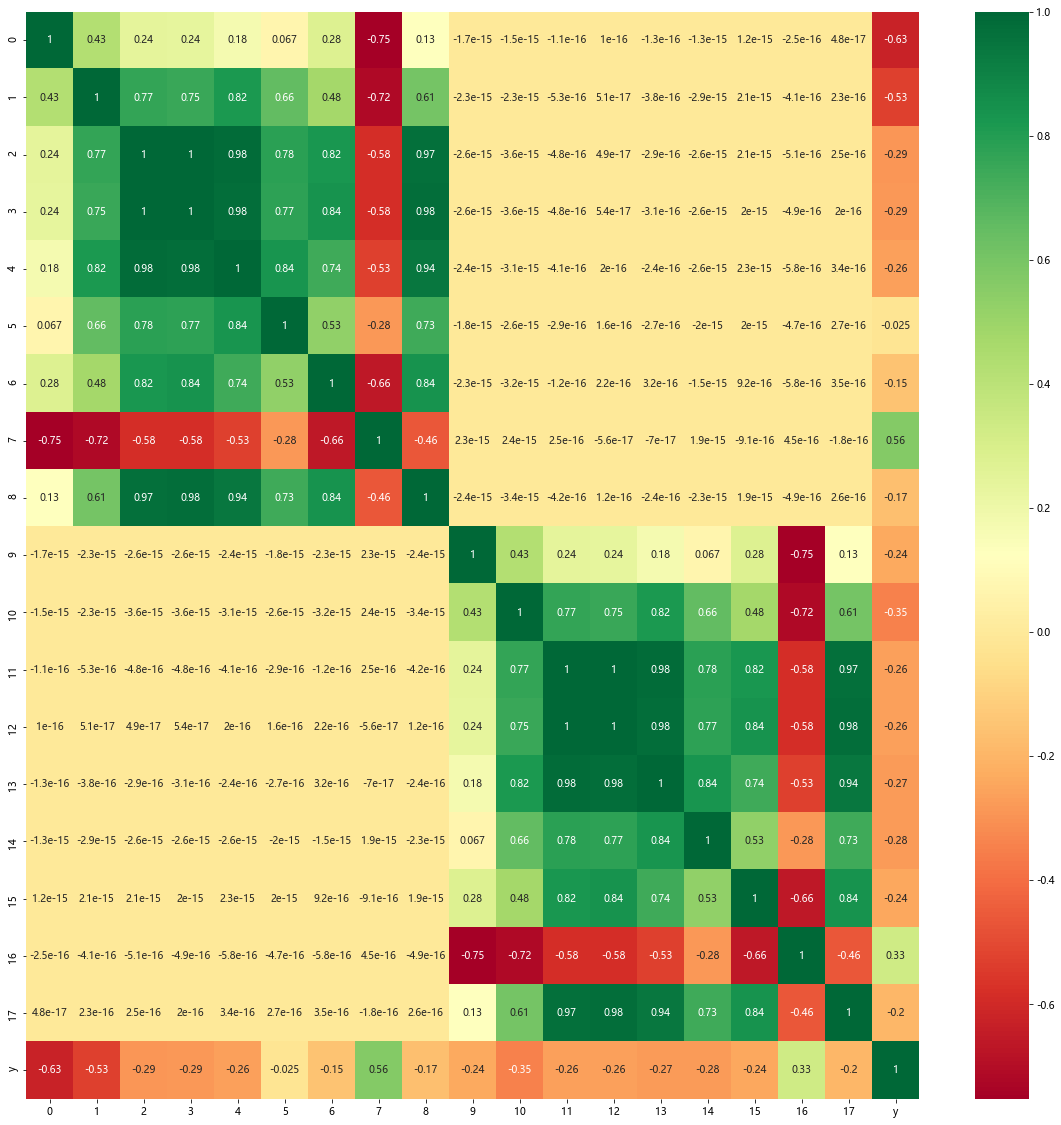

In [47]:
plt.figure(figsize = (20, 20))
sns.heatmap(df.corr(), cmap = 'RdYlGn', annot = True)
plt.show

In [56]:
mask = np.zeros_like(df.corr(), dtype = bool)
for i in range(len(mask)):
    for j in range(i+1, len(mask[0])):
        mask[i][j] = True

<function matplotlib.pyplot.show(close=None, block=None)>

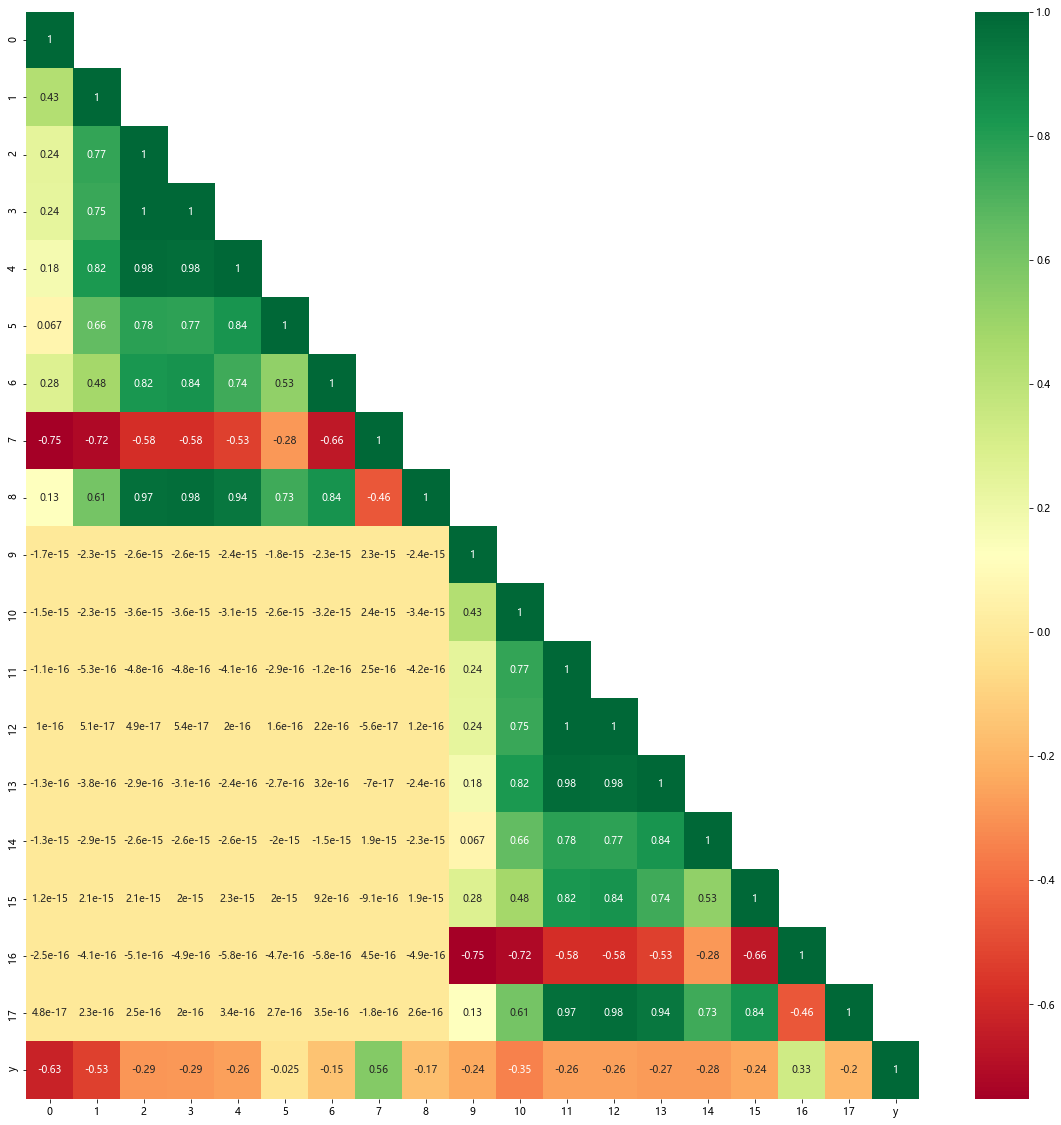

In [57]:
plt.figure(figsize = (20, 20))
sns.heatmap(df.corr(), cmap = 'RdYlGn', annot = True, mask = mask)
plt.show